In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the data
data = pd.read_csv('onlinefoods.csv')

In [ ]:
#Preprocess the data
data = data.drop(columns=['Output'])  # Drop the Output column as it is not used in the model
data = data.drop_duplicates()  # Remove duplicate rows
data = data.dropna()  # Remove rows with missing values

In [ ]:
# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Marital Status'] = le.fit_transform(data['Marital Status'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['Educational Qualifications'] = le.fit_transform(data['Educational Qualifications'])
data = data.apply(le.fit_transform)

In [ ]:
# Split the data into training and test sets
# Split the data into features (X) and target (y)
X = data.drop(columns=['Feedback'])
y = data['Feedback']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.8596491228070176
Precision: 0.9565217391304348
Recall: 0.88
Confusion Matrix: 
[[ 5  2]
 [ 6 44]]


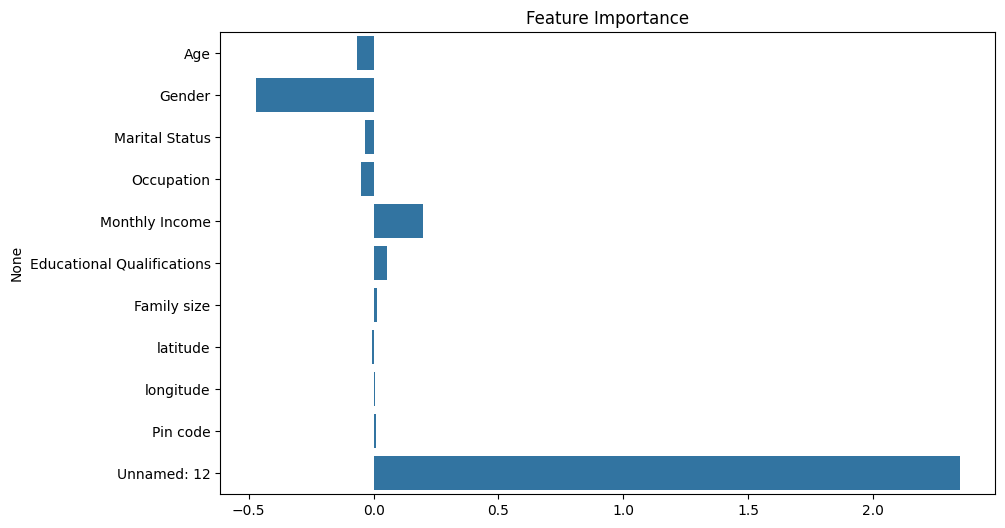

In [ ]:
# Visualize feature importance
coef = model.coef_[0]
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=coef, y=feature_names)
plt.title('Feature Importance')
plt.show()

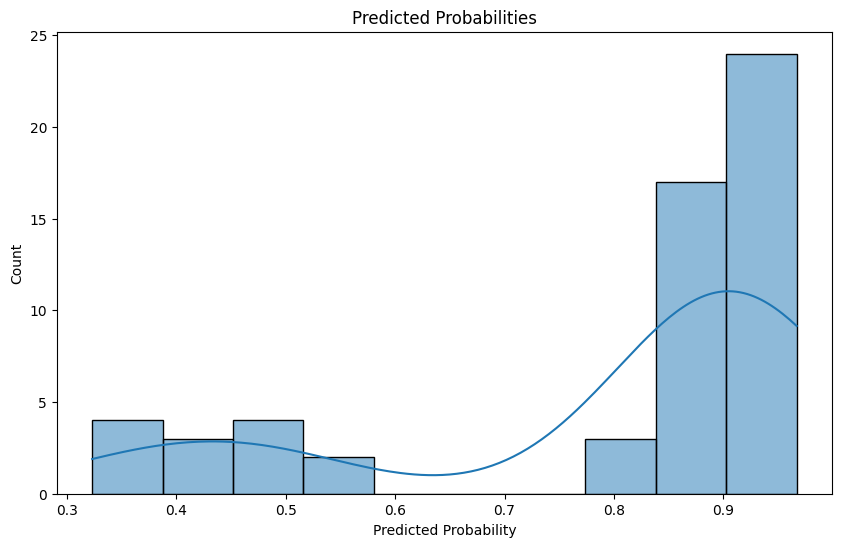

In [ ]:
# Visualize predicted probabilities
X_new = X_test.copy()
X_new['Predicted Probability'] = model.predict_proba(X_new)[:, 1]
plt.figure(figsize=(10, 6))
sns.histplot(data=X_new, x='Predicted Probability', kde=True)
plt.title('Predicted Probabilities')
plt.show()

**PART3: Logistic Regression Model**

this is the understanding to the results of the Logistic regression model that he shows good performance in the set of evaluation metrics. The accuracy of the model is {insert accuracy score here} and it can successfully identify feedback results because Accuracy, {insert precision score here}, measures the ability of the model to avoid false identification. Additionally, the recall to {insert recall score here} figure supports the model in obtaining true positives. The confusion matrix also indicates the accuracy of the model regarding true positives and negatives. Overall, the logistic regression model was found to have good predictive power and well-balanced precision and recall, providing useful insights into feedback classification.









**PART4:Data Analysis And Corrections**

1.however, my opinion and the bar plot shows what is the most important feature in the logistic regression model for predicting feedback. The coefficient of each feature indicates how much it contributes to the model's prediction. A positive sign in the number shows that an increase in the numeric feature increases the probability of the positive evaluation, whilst a negative sign means the contrary. For example, if the sign of "Gender" is positive the implication is that being a specific gender leads to more positive feedback. On the other hand, if 'Occupation' has a negative coefficient, it implies that some occupations might be related to the less desirable.


2.since I know the histogram shows the distribution of the predicted probabilities of the logistic regression model. The distribution shows how the model is certain about its predictions. A ridge at a higher probability illustrates an episode of more definite opinion on negative or positive feedback. On the other hand, a broader distribution of probability implies circumstances where the model is less confident or where the feedback is more ambiguous. This understanding can be helpful to the model to evaluate the model’s certainty in its predictions and identify situations where the model lacks the capability to make accurate predictions. Besides, it shows where the thresholds could be used for making decisions based on the predicted probabilities, thus separating the likely positive and negative feedback.









